In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
from SRC.functions import connectCollection,getLocation_offices

## Looking for the city with the maximun number of video games companies

In [2]:
#Mongo DB parameters for both databases: companies database and the new one for storing the coords

# companies
db, coll = connectCollection('companies','companies')

# new database for storing coordinates
new_db, new_coll = connectCollection('Project_mongo','Best_location')

In [3]:
#number of video_games companies in the database

video_games = list(coll.find({'category_code':'games_video'}))

print(f'There are {len(video_games)} companies of video games in the companies database.')

There are 1083 companies of video games in the companies database.


In [4]:
#finding out which is the country where most of these companies are located -> USA

countries = []
    
for i in range(len(video_games)):
    try:
        company_country = video_games[i]['offices'][0]['country_code']
        countries.append(company_country)
    except:
        countries.append('no_data')
        
#transforming it to a data frame to get the top 3 countries      
countries = pd.DataFrame(countries)
countries['Count'] = 1

#Droping the unknown values
countries = countries[(countries[0] != 'no_data')]
countries[0].value_counts(normalize = True)
n_countries = countries.groupby([0]).count()
n_countries = n_countries.sort_values(by = ['Count'],ascending = False)

#Dataframe showing the top 3
n_countries.head(3)

,Count
0,
USA,534
GBR,62
CAN,35


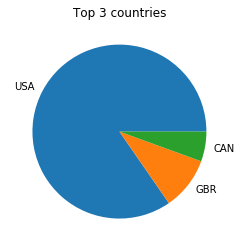

In [5]:
#pie chart showing top 3 countries in number of video games companies
top_countries = n_countries.head(3)
values = top_countries['Count']
labels = ['USA','GBR','CAN']
plt.pie(values,labels = labels)
plt.title('Top 3 countries')
plt.show()

In [6]:
#finding out which is the city where most of this companies are located -> New York

cities = []
    
for i in range(len(video_games)):
    try:
        company_city = video_games[i]['offices'][0]['city']
        cities.append(company_city)
    except:
        cities.append('no_data')


# transforming it to a data frame to get the top 3 cities  
cities = pd.DataFrame(cities)
cities['Count'] = 1

# Droping the unknown values
cities = cities[((cities[0] != 'no_data')&(cities[0] != '') )]
cities[0].value_counts(normalize = True)
n_cities = cities.groupby([0]).count()
n_cities = n_cities.sort_values(by = ['Count'],ascending = False)

# Dataframe showing the top 3
n_cities.head(3)

,Count
0,
New York,70
San Francisco,58
London,28


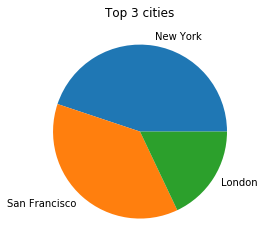

In [7]:
# pie chart showing top 3 cities in number of video games companies
top_cities = n_cities.head(3)
values = top_cities['Count']
labels = ['New York','San Francisco','London']
plt.pie(values,labels = labels)
plt.title('Top 3 cities')
plt.show()

## Video games companies in New York

In [8]:
# companies of video games that are located in New York

games_ny = list(coll.find({"$and":[
                                {'category_code':'games_video'},
                                {'offices.city':'New York'},
                                {'offices.latitude':{'$ne':None}},
                                {'offices.longitude':{'$ne':None}},
                                {'deadpoled_year':None}
                                ]}))
print(f'There are {len(games_ny)} video games companies in New York.')

There are 46 video games companies in New York.


In [9]:
# map with the offices of video games companies in New York
map_city = folium.Map(location=[40.730610,-73.935242], zoom_start=10)

for i in range(len(games_ny)):
    folium.Marker([games_ny[i]['offices'][0]['latitude'],games_ny[i]['offices'][0]['longitude']],
                    radius=2,
                    icon=folium.Icon(prefix='fa',icon='gamepad',color='blue'), 
                   ).add_to(map_city)
display(map_city)

In [10]:
# storing the coordinates in the database
"""for place in games_ny:
    value = getLocation_offices(place,'Video games companies')
    new_coll.insert_one(value)"""

"for place in games_ny:\n    value = getLocation_offices(place,'Video games companies')\n    new_coll.insert_one(value)"

## Companies with less than 10 years in New York

In [11]:
# companies founded before 2009 in New York
office_10 = list(coll.find({"$and":[{'founded_year':{'$lt':2009}},
                                    {'offices.city':'New York'},
                                    {'offices.latitude':{'$ne':None}},
                                    {'offices.longitude':{'$ne':None}},
                                    {'deadpoled_year':None}                            
                                   ]}))
                 
print(f'There are {len(office_10)} companies founded before 2009 in New York.')

There are 410 companies founded before 2009 in New York.


In [12]:
# map with companies founded before 2009 in New York
map_city = folium.Map(location=[40.730610,-73.935242], zoom_start=10)

for i in range(len(office_10)):
    folium.Marker([office_10[i]['offices'][0]['latitude'],office_10[i]['offices'][0]['longitude']],
                    radius=0.5,
                    icon=folium.Icon(prefix='fa',icon='blind',color='red'), 
                   ).add_to(map_city)
display(map_city)

In [13]:
# storing the coordinates in the database
"""for place in office_10:
    value = getLocation_offices(place,'Old companies')
    new_coll.insert_one(value)"""

"for place in office_10:\n    value = getLocation_offices(place,'Old companies')\n    new_coll.insert_one(value)"